In [24]:
# Define Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.ensemble.forest import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import make_scorer, accuracy_score, precision_score, mean_squared_error
from sklearn.metrics import average_precision_score
from sklearn.impute import SimpleImputer

import warnings
warnings.filterwarnings('ignore')


In [25]:
def clean_numeric(x, function='int'):
	try:
		if function == 'float':
			result = float(x)
		else: 
			result = int(x)
	except:
		result = np.nan
	return result

def clean_numeric_column(data, column_name, function='int'):
	imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
	result = imputer.fit_transform(np.array(data[column_name].apply(lambda x: clean_numeric(x, function))).reshape(-1,1)).flatten()
	return pd.Series(result)

def clean_all_columns(data):
	result = data.copy()
	for x in [('GPA', 'float'), 'Gender', 'breakfast', 'calories_chicken',	'calories_day', 'calories_scone', 'coffee', 
	'comfort_food_reasons_coded', 'cook', 'comfort_food_reasons_coded', 'cuisine', 'diet_current_coded', 'eating_changes_coded',
	'eating_changes_coded1', 'eating_out', 'employment', 'ethnic_food', 'exercise', 'father_education', 'fav_cuisine_coded', 'fav_food',
	'fries', 'fruit_day', 'grade_level', 'greek_food', 'ideal_diet_coded', 'income', 'indian_food', 'italian_food', 'life_rewarding', 'marital_status', 
	'mother_education', 'nutritional_check', 'on_off_campus', 'parents_cook', 'pay_meal_out', 'persian_food', 'self_perception_weight', 'soup', 'sports', 'thai_food', 'tortilla_calories', 'turkey_calories',
	'veggies_day', 'vitamins', 'waffle_calories', 'weight']:
		if type(x) == tuple:
			clean_column = clean_numeric_column(result, x[0], x[1])
			result.drop(labels=x[0], axis='columns', inplace=True)
			result[x[0]] = clean_column
		else:
			clean_column = clean_numeric_column(result, x, 'int')
			result.drop(labels=x, axis='columns', inplace=True)
			result[x] = clean_column
	return result

In [26]:
#load file
df=pd.read_csv("food_coded.csv")
df.head(5)
df_1 = clean_all_columns(df)

print(df_1.columns)
#print(y.columns)
#print(y.head(5))


# Simplying data due to low training data avaialble
    # Removing 2,6,7 categroy due to low count
    # Adding 8 to 4 because indian food also comes under the umbrella of Asian food
    # Removing 0 because they are undecided and have low counts

print(df_1.groupby(['fav_cuisine_coded']).fav_cuisine_coded.count())

df_1.loc[df_1['fav_cuisine_coded']==8] = 4
df_1=df_1[df_1['fav_cuisine_coded'].isin([1,2,4,5])]

print(df_1.groupby(['fav_cuisine_coded']).fav_cuisine_coded.count())
print((df_1.groupby(['fav_cuisine_coded']).fav_cuisine_coded.count())/len(df_1))
# Split it into input features and output 




Index(['comfort_food', 'comfort_food_reasons', 'comfort_food_reasons_coded.1',
       'diet_current', 'drink', 'eating_changes', 'father_profession',
       'fav_cuisine', 'food_childhood', 'healthy_feeling', 'healthy_meal',
       'ideal_diet', 'meals_dinner_friend', 'mother_profession', 'type_sports',
       'GPA', 'Gender', 'breakfast', 'calories_chicken', 'calories_day',
       'calories_scone', 'coffee', 'cook', 'comfort_food_reasons_coded',
       'cuisine', 'diet_current_coded', 'eating_changes_coded',
       'eating_changes_coded1', 'eating_out', 'employment', 'ethnic_food',
       'exercise', 'father_education', 'fav_cuisine_coded', 'fav_food',
       'fries', 'fruit_day', 'grade_level', 'greek_food', 'ideal_diet_coded',
       'income', 'indian_food', 'italian_food', 'life_rewarding',
       'marital_status', 'mother_education', 'nutritional_check',
       'on_off_campus', 'parents_cook', 'pay_meal_out', 'persian_food',
       'self_perception_weight', 'soup', 'sports', 'thai

In [27]:

for (i,names) in enumerate(df_1.columns):
    print (i," : ",names)
#string_cols = [0,7,8,13,16,24,25,28,34,35,42,44,56,60]    
string_cols = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14]
#0 cleanign string 

df_retain = df_1.drop(df_1.columns[string_cols], axis = 1) 
#print(df_retain.head(5))



0  :  comfort_food
1  :  comfort_food_reasons
2  :  comfort_food_reasons_coded.1
3  :  diet_current
4  :  drink
5  :  eating_changes
6  :  father_profession
7  :  fav_cuisine
8  :  food_childhood
9  :  healthy_feeling
10  :  healthy_meal
11  :  ideal_diet
12  :  meals_dinner_friend
13  :  mother_profession
14  :  type_sports
15  :  GPA
16  :  Gender
17  :  breakfast
18  :  calories_chicken
19  :  calories_day
20  :  calories_scone
21  :  coffee
22  :  cook
23  :  comfort_food_reasons_coded
24  :  cuisine
25  :  diet_current_coded
26  :  eating_changes_coded
27  :  eating_changes_coded1
28  :  eating_out
29  :  employment
30  :  ethnic_food
31  :  exercise
32  :  father_education
33  :  fav_cuisine_coded
34  :  fav_food
35  :  fries
36  :  fruit_day
37  :  grade_level
38  :  greek_food
39  :  ideal_diet_coded
40  :  income
41  :  indian_food
42  :  italian_food
43  :  life_rewarding
44  :  marital_status
45  :  mother_education
46  :  nutritional_check
47  :  on_off_campus
48  :  parent

In [28]:
#test-train split using stratification

# STRATIFIED SAMPLING 
X = df_retain.loc[:, df_retain.columns != 'fav_cuisine_coded']
y = df_retain[['fav_cuisine_coded']]

X_train, tempX_test, y_train, tempY_test = train_test_split(X, y,stratify=y,test_size=0.30)
x_val, x_test, y_val, y_test = train_test_split(tempX_test, tempY_test,stratify=tempY_test,test_size=0.64)

# Training Set : X_train, y_train
# Validation Set : x_val ,  y_val
# Testing Set : x_test , y_test


#print(y_train.groupby(['fav_cuisine_coded']).fav_cuisine_coded.count())
#print(y_test.groupby(['fav_cuisine_coded']).fav_cuisine_coded.count())
#print(y_val.groupby(['fav_cuisine_coded']).fav_cuisine_coded.count())
#print(X_train.head(2))

In [29]:
def feature_selection_RF(X_train, y_train,x_val ,  y_val):
    clf = RandomForestClassifier(n_estimators = 100, random_state=0, n_jobs=-1)
    clf.fit(X_train, y_train)
    #for feature in zip(X_train.columns, clf.feature_importances_):
        #print(feature)
    sfm = SelectFromModel(clf, threshold=0.025)
    sfm.fit(X_train, y_train)
    #for feature_list_index in sfm.get_support(indices=True):
        #print(X_train.columns[feature_list_index])
    
    X_important_train = sfm.transform(X_train)
    X_important_val = sfm.transform(x_val)
    
    clf_important = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
    clf_important.fit(X_important_train, y_train)
    
    y_pred = clf.predict(x_val)
    acc_full = accuracy_score(y_val, y_pred)
    print(acc_full)
    
    y_important_pred = clf_important.predict(X_important_val)
    acc_new = accuracy_score(y_val, y_important_pred)
    print(acc_new)
    top__cols = list(X_train.columns[sfm.get_support(indices=True)])
    #print(top__cols)
    return top__cols

In [30]:
#standardization

    # This will be done once data is cleaned

In [31]:
# Data Exploration
# scatter plots

# sns.set()
# sns.pairplot(X_train)
# plt.show();

In [32]:
# histograms

# %matplotlib inline
# X_train.hist(bins=50, figsize=(50,50))
# plt.show()

In [33]:
#Data Exploration based on Clustering

#df_new = df.iloc[:,[37,19,10,]]
# Low income has greater eating out, low cook average

#df_new = df.iloc[:,[17,19,48]]
# When eating changes better, greater eating out, less pay meal out (go out more frequent but want to pay less. )

df_new = df.iloc[:,[4,19,48]]
# Calories greater, eating out more, pay meal less (those going out & calories-aware are willing to pay less)

#df_new = df.iloc[:,[4,15]]
# Calories-aware prefer orange juice over SIDA

#df_new = df.iloc[:,[19,47]]
# Simple ,, parent cook more, you eat out less

#df_new = df.iloc[:,[37,47]]
#No relation b/w income and parent_cook so it means parent_cook doesn't depend on your income 

#df_new = df.iloc[:,[12,47]]
#No relation b/w income and parent_cook so it means parent_cook doesn't depend on your income 

#df_new = df.iloc[:,[17,12]]
#No relation b/w eating_changes_coded and cuisine

In [34]:
df_1 = pd.DataFrame(X,columns = df_new.columns)
from sklearn.cluster import KMeans
myKMC = KMeans(n_clusters = 2)
myKMC.fit(df_1)

cluster_map = pd.DataFrame()
cluster_map['data_index'] = df_1.index.values
cluster_map['cluster'] = myKMC.labels_
results = pd.concat([df_1,cluster_map],axis=1,sort=False)
print(results.groupby(['cluster']).mean())

         calories_day  eating_out  pay_meal_out  data_index
cluster                                                    
0.0          3.053267    2.585366      3.365854   62.402299
1.0          3.084513    2.875000      3.541667   66.035714


In [35]:
def correlation_matrix(df_1):
    from matplotlib.colors import ListedColormap
    
    corrMatrix = df.corr()
    fig, ax = plt.subplots(figsize=(30,30))
    #sns.heatmap(corrMatrix,cmap=ListedColormap(['green','green', 'yellow','red', 'red']), annot=True,linewidths=.5, ax=ax)
    sns.heatmap(corrMatrix, annot=True,linewidths=.5, ax=ax)   
    plt.show()

In [36]:
#correlation_matrix(df_sel_clean)

In [37]:
def chi_square_feature_sel(X_train,y_train,total_col_selected):
    df_train_chi_ind = X_train
    df_train_chi_dep = y_train
    
    bestfeatures = SelectKBest(score_func=chi2, k=20)
    fit = bestfeatures.fit(df_train_chi_ind,df_train_chi_dep)
    
    dfscores = pd.DataFrame(fit.scores_)
    dfcolumns = pd.DataFrame(df_train_chi_ind.columns)
    
    #concat two dataframes for better visualization 
    
    featureScores = pd.concat([dfcolumns,dfscores],axis=1)
    
    featureScores.columns = ['Specs','Score']  #naming the dataframe columns
    #print(featureScores.nlargest(20,'Score'))  #print 10 best features
    
    top_n_columns = featureScores.sort_values('Score',ascending=False).head(total_col_selected).Specs
    return top_n_columns

In [38]:
top_n_cols = chi_square_feature_sel(X_train,y_train,20)
top_n_cols_RF = feature_selection_RF(X_train, y_train,x_val,y_val)

top_n_cols_final =  set(top_n_cols).intersection(set(top_n_cols_RF))
#top_n_cols.append('fav_cuisine_coded')
print( set(top_n_cols) & set(top_n_cols_RF))

#Commenting others and proceeding with the data that gives best ensemble learning accuracy on test set

X_train =  X_train[X_train.columns.intersection(top_n_cols_final)]
x_val =  x_val[x_val.columns.intersection(top_n_cols_final)]
x_test =  x_test[x_test.columns.intersection(top_n_cols_final)]

# top_n_cols=list(top_n_cols)
# X_train =  X_train[X_train.columns.intersection(top_n_cols)]
# x_val =  x_val[x_val.columns.intersection(top_n_cols)]
# x_test =  x_test[x_test.columns.intersection(top_n_cols)]

# X_train =  X_train[X_train.columns.intersection(top_n_cols_RF)]
# x_val =  x_val[x_val.columns.intersection(top_n_cols_RF)]
# x_test =  x_test[x_test.columns.intersection(top_n_cols_RF)]

#df_sel_features =  df_sel_clean[df_sel_clean.columns.intersection(top_n_cols)]

0.75
0.5833333333333334
{'thai_food', 'exercise', 'eating_out', 'comfort_food_reasons_coded', 'on_off_campus', 'waffle_calories', 'weight', 'ethnic_food', 'life_rewarding', 'income'}


In [39]:
#standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train) 
X_train = pd.DataFrame(scaler.transform(X_train),columns = X_train.columns)

scaler = StandardScaler()
scaler.fit(x_val) 
x_val = pd.DataFrame(scaler.transform(x_val),columns = x_val.columns)

scaler = StandardScaler()
scaler.fit(x_test) 
x_test = pd.DataFrame(scaler.transform(x_test),columns = x_test.columns)

    # This will be done once data is cleaned

In [40]:
#model implementation
from sklearn.linear_model import LogisticRegression
softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, random_state=42)
softmax_reg.fit(X_train, y_train)

c_est = softmax_reg.predict(x_val)
probs = softmax_reg.predict_proba(x_val)
print(c_est)

#print(x_val)
#print(y_val)

from sklearn.metrics import accuracy_score

#accuracy_score(y_val, c_est)


# GBT (Gradient Boosting Trees)
# Logistic Regeression

#Ensemble Learning 


c_est = softmax_reg.predict(x_test)
accuracy_score(y_test, c_est)



[1. 2. 1. 1. 4. 2. 1. 5. 1. 5. 4. 1.]


0.34782608695652173

In [41]:
#Grid search for finding right hyperparameter for Multinomial and One vs All Regression

from sklearn.model_selection import GridSearchCV

#acc_scorer = make_scorer(average_precision)

grid={"C":np.logspace(-3,3,7),"multi_class":["multinomial","ovr",], "penalty":["l1","l2"], "solver":["lbfgs","saga","newton-cg"]} # l1 lasso l2 ridge
logreg=LogisticRegression(random_state=42)
logreg_cv=GridSearchCV(logreg, grid, cv=10, scoring = 'f1_weighted')
logreg_cv.fit(X_train,y_train)


print("Tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("Accuracy :",logreg_cv.best_score_)


# Set the logreg_best to the best combination of parameters
logreg_best = logreg_cv.best_estimator_

# Fit the best algorithm to the data. 
logreg_best.fit(X_train, y_train)

logreg_est = logreg_best.predict(x_test)
accuracy_score(y_test, logreg_est)

print (logreg_est)

Tuned hpyerparameters :(best parameters)  {'C': 100.0, 'multi_class': 'multinomial', 'penalty': 'l2', 'solver': 'lbfgs'}
Accuracy : 0.45186868686868686
[1. 4. 5. 5. 1. 4. 1. 1. 4. 2. 1. 1. 1. 2. 2. 5. 1. 1. 1. 1. 1. 2. 2.]


In [42]:
#print(logreg_best.intercept_)
#print(logreg_best.coef_)
print(np.exp(logreg_best.coef_))

#for (i,names) in enumerate(X_train.columns):
    #print (i," : ",names)

for j in range(4):
    feature_importance = abs(logreg_best.coef_[j])
    absolute_feature_importance = abs(logreg_best.coef_[j])
    feature_importance = np.exp(logreg_best.coef_[j])
    feature_importance = [x - 1 for x in feature_importance]
    feature_importance = list(np.around(np.array(feature_importance),2))
    from operator import itemgetter 
    top_features = sorted(range(len(absolute_feature_importance)), key=lambda i: absolute_feature_importance[i], reverse=True)[:5]
    top_features_values = itemgetter(*top_features)(feature_importance)
    top_features_column = X_train.columns[top_features]
    print(top_features)
    print(top_features_values)
    print(top_features_column)
    # Need to create historgram only
    # ONe histogram for important features of every food
    # One historgram per Food about importance
    

[[0.92946983 1.31438618 0.86996529 1.10253515 1.52333924 0.71965833
  0.5874192  1.47960991 0.61351409 1.12614255]
 [1.16928715 2.17762169 2.53788865 0.61034187 0.58135644 1.31571259
  1.12804426 0.68167102 6.48889053 1.2898174 ]
 [0.59697805 1.17773089 1.45845153 1.83913552 0.75572156 0.84838994
  0.90888653 1.88313835 0.41873714 1.00935707]
 [1.54129284 0.29665284 0.31055141 0.8080173  1.49416676 1.24485023
  1.66041274 0.52649677 0.59987882 0.68207726]]
[6, 8, 4, 7, 5]
(-0.41, -0.39, 0.52, 0.48, -0.28)
Index(['on_off_campus', 'waffle_calories', 'income', 'thai_food',
       'life_rewarding'],
      dtype='object')
[8, 2, 1, 4, 3]
(5.49, 1.54, 1.18, -0.42, -0.39)
Index(['waffle_calories', 'ethnic_food', 'eating_out', 'income', 'exercise'], dtype='object')
[8, 7, 3, 0, 2]
(-0.58, 0.88, 0.84, -0.4, 0.46)
Index(['waffle_calories', 'thai_food', 'exercise',
       'comfort_food_reasons_coded', 'ethnic_food'],
      dtype='object')
[1, 2, 7, 8, 6]
(-0.7, -0.69, -0.47, -0.4, 0.66)
Index(['e

In [43]:
#Grid search for finding right hyperparameter for Gradient Boost Classification

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

# parameters = {
#     "loss":["deviance"],
#     "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
#     "min_samples_split": np.linspace(0.1, 0.5, 12),
#     "min_samples_leaf": np.linspace(0.1, 0.5, 12),
#     "max_depth":[3,5,8],
#     "max_features":["log2","sqrt"],
#     "criterion": ["friedman_mse",  "mae"],
#     "subsample":[0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0],
#     "n_estimators":[10]
#     }

#Using a subset of parameters for early computation, more parameters could be added from above sample

parameters = {
    "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2, 0.3, 0.4, 0.5, 0.6],
    "n_estimators":[10, 20, 30, 40 ,50, 60, 70, 80, 90, 100]
    }

acc_scorer = make_scorer(accuracy_score)

grad_cv = GridSearchCV(GradientBoostingClassifier(random_state=42), parameters, cv=10, scoring='f1_weighted')
grad_cv.fit(X_train, y_train)

print("tuned hpyerparameters :(best parameters) ",grad_cv.best_params_)
print("accuracy :",grad_cv.best_score_)

# Set the grad_best to the best combination of parameters
grad_best = grad_cv.best_estimator_

# Fit the best algorithm to the data. 
grad_best.fit(X_train, y_train)

grad_est = grad_best.predict(x_test)
accuracy_score(y_test, grad_est)

print (grad_est)

tuned hpyerparameters :(best parameters)  {'learning_rate': 0.2, 'n_estimators': 10}
accuracy : 0.4327579365079364
[1. 1. 1. 5. 1. 1. 1. 1. 4. 4. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 5. 2. 1.]


In [44]:
#Grid search for finding right hyperparameter for Ada Boost Classification

from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV

parameters = {
    "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2, 0.3, 0.4, 0.5, 0.6],
    "n_estimators":[10, 20, 30, 40 ,50, 60, 70, 80, 90, 100]
    }

acc_scorer = make_scorer(accuracy_score)

ada_cv = GridSearchCV(AdaBoostClassifier(random_state=42), parameters, cv=10, scoring='f1_weighted')
ada_cv.fit(X_train, y_train)

print("tuned hpyerparameters :(best parameters) ",ada_cv.best_params_)
print("accuracy :",ada_cv.best_score_)

# Set the ada_best to the best combination of parameters
ada_best = ada_cv.best_estimator_

# Fit the best algorithm to the data. 
ada_best.fit(X_train, y_train)

ada_est = ada_best.predict(x_test)
accuracy_score(y_test, ada_est)

print (ada_est)

tuned hpyerparameters :(best parameters)  {'learning_rate': 0.5, 'n_estimators': 100}
accuracy : 0.42743686868686864
[1. 1. 1. 5. 1. 1. 1. 1. 4. 4. 1. 1. 1. 2. 1. 4. 1. 1. 1. 1. 1. 4. 2.]


In [45]:
#Ensemble learning implementation, with Logistic Regression (Multinomial or OVA), Gradient and Ada-Boost 

from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, f1_score, log_loss

voting_clf = VotingClassifier(estimators=[('LRM', logreg_best), ('GDB', grad_best), ('ADB', ada_best)], voting='soft')
voting_clf.fit(X_train, y_train)

preds = voting_clf.predict(x_test)
acc = accuracy_score(y_test, preds)

print("Accuracy is: " + str(acc))
print (preds)

Accuracy is: 0.5652173913043478
[1. 1. 5. 5. 1. 1. 1. 1. 4. 4. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 2. 1.]


In [46]:
#test-train split using StratifiedKFold that also shuffles the data

from sklearn.model_selection import KFold, StratifiedKFold, ShuffleSplit

X = df_sel_clean.loc[:, df_sel_clean.columns != 'fav_cuisine_coded']
y = df_sel_clean[['fav_cuisine_coded']]

cv = StratifiedKFold(n_splits=5)
for train, test in cv.split(X,y):
    print(train)

[  3   5  16  23  24  29  31  32  33  34  35  36  37  38  39  40  41  42
  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60
  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78
  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96
  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114
 115 116 117 118 119 120 121 122 123 124]
[  0   1   2   4   6   7   8   9  10  11  12  13  14  15  16  17  18  19
  20  21  22  25  26  27  28  30  47  48  49  54  55  56  57  58  59  60
  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78
  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96
  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114
 115 116 117 118 119 120 121 122 123 124]
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45

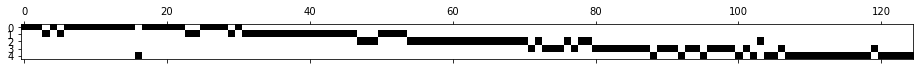

In [47]:
#Function for visualization of K-fold Stratified Sampling with 5 splits

def plot_cv(cv, features, labels):
    masks = []
    for train, test in cv.split(features, labels):
        mask = np.zeros(len(labels), dtype=bool)
        mask[test] = 1
        masks.append(mask)
    
    plt.matshow(masks, cmap='gray_r')
    
plot_cv(StratifiedKFold(n_splits=5),X,y)

In [48]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(voting_clf, X, y, cv=cv)
print(scores)
print("Mean:", np.mean(scores.mean()))
print("Standard deviation:", np.mean(scores.std()))

#Small SD indicates that the model doesn't overfit to a particular chunk of a data

[0.36 0.4  0.44 0.52 0.44]
Mean: 0.43200000000000005
Standard deviation: 0.053065996645686404


In [49]:
from sklearn.metrics import multilabel_confusion_matrix

# classes = ['Italian/French/Greek', 'Spanish/mexican', 'Asian/Chinese/Thai/Nepal/Indian', 'American']
# multilabel_confusion_matrix(y_test, preds)

In [50]:
from sklearn.metrics import confusion_matrix

classes = ['Italian/French/Greek', 'Spanish/mexican', 'Asian/Chinese/Thai/Nepal/Indian', 'American']
#confusion_matrix(y_test, preds)

                                 precision    recall  f1-score   support

           Italian/French/Greek       0.59      0.83      0.69        12
                Spanish/mexican       0.00      0.00      0.00         3
Asian/Chinese/Thai/Nepal/Indian       1.00      0.40      0.57         5
                       American       0.50      0.33      0.40         3

                       accuracy                           0.57        23
                      macro avg       0.52      0.39      0.42        23
                   weighted avg       0.59      0.57      0.54        23



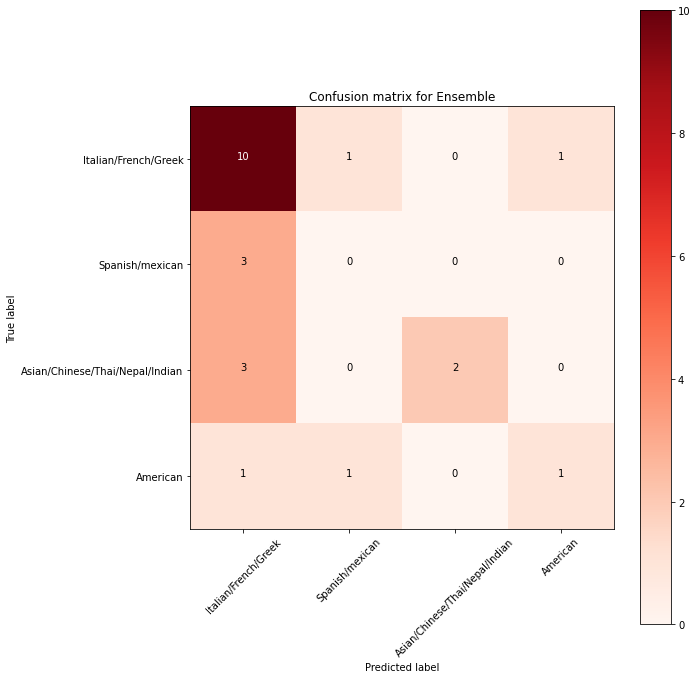

In [51]:
# print or plot  metrics / results

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import itertools

classes = ['Italian/French/Greek', 'Spanish/mexican', 'Asian/Chinese/Thai/Nepal/Indian', 'American']
print(classification_report(y_test, preds, target_names=classes))

cm = confusion_matrix(y_test, preds)
classes = ['Italian/French/Greek', 'Spanish/mexican', 'Asian/Chinese/Thai/Nepal/Indian', 'American']
fig = plt.figure(figsize=(10,10))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Reds)
plt.title('Confusion matrix for Ensemble')
plt.colorbar()
tick_marks = np.arange(len(classes))

plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

normalize = False
fmt = '.2f' if normalize else 'd'

thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

plt.show()

In [52]:
#Calculating lifts for the selected model

#Now the normalize the diagonal entries
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

#The diagonal entries are the accuracies of each class
predicted_values = cm.diagonal()

print("Lift for Italian/French/Greek:", predicted_values[0]/average_rate[1])
print("Lift for Spanish/mexican:", predicted_values[1]/average_rate[2])
print("Lift for Asian/Chinese/Thai/Nepal/Indian:", predicted_values[2]/average_rate[4])
print("Lift for American:", predicted_values[3]/average_rate[5])

NameError: name 'average_rate' is not defined

In [ ]:
# Final hold-out sample testing

In [ ]:
# Applying Gradient Boosting Classifier

from sklearn.ensemble import GradientBoostingClassifier

grad_boost = GradientBoostingClassifier(random_state=42)
grad_boost.fit(X_train, y_train)

gb_est = grad_boost.predict(x_test)
accuracy_score(y_test, gb_est)
#print(gb_est)

In [ ]:
# Applying AdaBoosting Classifier

from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification

ada_boost = AdaBoostClassifier(n_estimators=100, random_state=42)
ada_boost.fit(X_train, y_train)
AdaBoostClassifier(n_estimators=100, random_state=0)


ab_est = ada_boost.predict(x_test)
accuracy_score(y_test, ab_est)
#print(ab_est)